In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/mc+shenzhen.zip'

Archive:  /content/mc+shenzhen.zip
   creating: mc+shenzhen/train/
  inflating: mc+shenzhen/train/CHNCXR_0004_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0010_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0011_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0019_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0020_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0025_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0026_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0033_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0034_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0038_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0041_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0043_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0052_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0053_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0055_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0057_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0059_0.png  
  inflating: mc+shenzhen/train/CHNCXR_0060_0.png  
  inflating: mc

In [ ]:
!mv  mc+shenzhen train

In [ ]:
from glob import glob
ntb = glob('train/train/*_0.png')
tb = glob('train/val/*_1.png')

In [ ]:
!mkdir train_main
!mkdir train_main/ntb

In [ ]:
files = ' '.join(ntb)

In [ ]:
files

'train/train/CHNCXR_0159_0.png train/train/CHNCXR_0224_0.png train/train/CHNCXR_0256_0.png train/train/CHNCXR_0059_0.png train/train/MCUCXR_0097_0.png train/train/CHNCXR_0110_0.png train/train/CHNCXR_0233_0.png train/train/MCUCXR_0042_0.png train/train/CHNCXR_0137_0.png train/train/MCUCXR_0055_0.png train/train/CHNCXR_0217_0.png train/train/CHNCXR_0043_0.png train/train/CHNCXR_0025_0.png train/train/CHNCXR_0274_0.png train/train/CHNCXR_0144_0.png train/train/CHNCXR_0197_0.png train/train/CHNCXR_0085_0.png train/train/CHNCXR_0089_0.png train/train/CHNCXR_0004_0.png train/train/CHNCXR_0113_0.png train/train/MCUCXR_0081_0.png train/train/CHNCXR_0062_0.png train/train/CHNCXR_0313_0.png train/train/MCUCXR_0038_0.png train/train/CHNCXR_0150_0.png train/train/CHNCXR_0053_0.png train/train/CHNCXR_0075_0.png train/train/MCUCXR_0061_0.png train/train/CHNCXR_0291_0.png train/train/CHNCXR_0229_0.png train/train/CHNCXR_0055_0.png train/train/CHNCXR_0254_0.png train/train/MCUCXR_0044_0.png train/tra

In [ ]:
!mv -t train_main/ntb $files

In [ ]:
!mkdir train_main/tb


In [ ]:
files = ' '.join(tb)


In [ ]:
files

'train/val/CHNCXR_0376_1.png train/val/CHNCXR_0591_1.png train/val/CHNCXR_0404_1.png train/val/CHNCXR_0620_1.png train/val/MCUCXR_0166_1.png train/val/CHNCXR_0492_1.png train/val/CHNCXR_0659_1.png train/val/CHNCXR_0414_1.png train/val/CHNCXR_0327_1.png train/val/CHNCXR_0482_1.png train/val/CHNCXR_0514_1.png train/val/CHNCXR_0341_1.png train/val/MCUCXR_0255_1.png train/val/CHNCXR_0406_1.png train/val/CHNCXR_0643_1.png train/val/MCUCXR_0141_1.png train/val/MCUCXR_0390_1.png train/val/CHNCXR_0644_1.png train/val/MCUCXR_0258_1.png train/val/CHNCXR_0504_1.png train/val/CHNCXR_0461_1.png train/val/MCUCXR_0367_1.png train/val/CHNCXR_0538_1.png train/val/CHNCXR_0519_1.png train/val/MCUCXR_0213_1.png train/val/CHNCXR_0641_1.png train/val/MCUCXR_0117_1.png train/val/CHNCXR_0551_1.png train/val/MCUCXR_0253_1.png train/val/CHNCXR_0613_1.png train/val/CHNCXR_0370_1.png train/val/CHNCXR_0529_1.png train/val/CHNCXR_0566_1.png train/val/CHNCXR_0508_1.png train/val/CHNCXR_0390_1.png train/val/CHNCXR_04

In [ ]:
!mv -t train_main/tb $files

In [ ]:
ntb_1 = glob('train_main/ntb/*.png')
tb_1 = glob('train_main/tb/*.png')

In [ ]:
from sklearn.model_selection import train_test_split
ntb_train, ntb_test = train_test_split(ntb_1, test_size=0.10)
tb_train, tb_test = train_test_split(tb_1, test_size=0.10)

In [ ]:
!mkdir test
!mkdir test/ntb

In [ ]:
files = ' '.join(ntb_test)

In [ ]:
files

'train_main/ntb/CHNCXR_0099_0.png train_main/ntb/MCUCXR_0023_0.png train_main/ntb/CHNCXR_0057_0.png train_main/ntb/CHNCXR_0038_0.png train_main/ntb/MCUCXR_0074_0.png train_main/ntb/CHNCXR_0025_0.png train_main/ntb/CHNCXR_0033_0.png train_main/ntb/CHNCXR_0221_0.png train_main/ntb/MCUCXR_0043_0.png train_main/ntb/CHNCXR_0059_0.png'

In [ ]:
!mv -t test/ntb $files

In [ ]:
!mkdir test/tb

In [ ]:
files = ' '.join(tb_test)

In [ ]:
!mv -t test/tb $files

In [ ]:
TRAIN_DIR = 'train_main'
TEST_DIR = 'test'

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input


#**INCEPTION V3**

In [ ]:
CLASSES = 2
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 172 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
EPOCHS = 15
BATCH_SIZE = 32


MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    
    validation_data=validation_generator)
  
model.save(MODEL_FILE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/15
6/6 [==============================] - 63s 10s/step - loss: 0.6102 - accuracy: 0.7093 - val_loss: 0.6309 - val_accuracy: 0.7000
Epoch 2/15
6/6 [==============================] - 61s 10s/step - loss: 0.5294 - accuracy: 0.7442 - val_loss: 0.5848 - val_accuracy: 0.6500
Epoch 3/15
6/6 [==============================] - 65s 12s/step - loss: 0.5354 - accuracy: 0.7384 - val_loss: 0.5949 - val_accuracy: 0.7500
Epoch 4/15
6/6 [==============================] - 61s 10s/step - loss: 0.5515 - accuracy: 0.7326 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 5/15
6/6 [==============================] - 62s 10s/step - loss: 0.5558 - accuracy: 0.7500 - val_loss: 0.6530 - val_accuracy: 0.6000
Epoch 6/15
6/6 [==============================] - 60s 11s/step - loss: 0.5102 - accuracy: 0.7558 - val_loss: 0.5525 - val_accuracy: 0.7000
Epoch 7/15
6/6 [==============================] - 61s 10s/step - loss: 0.5957 - accuracy: 0.7035 - val_loss: 0.6018 - val_accuracy: 0.6000
Epoch 8/15
6/6 [===========

In [ ]:
# testing the model
model.evaluate_generator(validation_generator, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.5679810643196106, 0.6499999761581421]

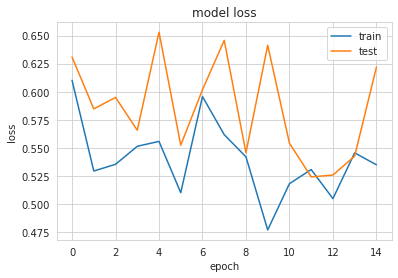

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

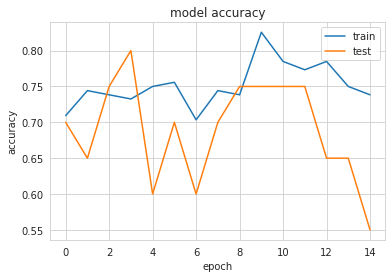

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#**RESNET 50**

In [ ]:
from keras.applications.resnet import ResNet50, preprocess_input
HEIGHT = 300
WIDTH = 300
CLASSES = 2
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Found 172 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
EPOCHS = 5
BATCH_SIZE = 32

VALIDATION_STEPS = 10

MODEL_FILE = 'resnet.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    
    validation_data=validation_generator,)
  
model.save(MODEL_FILE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/5
6/6 [==============================] - 61s 10s/step - loss: 0.6122 - accuracy: 0.7035 - val_loss: 0.6463 - val_accuracy: 0.7000
Epoch 2/5
6/6 [==============================] - 60s 10s/step - loss: 0.6051 - accuracy: 0.7209 - val_loss: 0.6285 - val_accuracy: 0.6500
Epoch 3/5
6/6 [==============================] - 66s 11s/step - loss: 0.6119 - accuracy: 0.7093 - val_loss: 0.5444 - val_accuracy: 0.6500
Epoch 4/5
6/6 [==============================] - 60s 10s/step - loss: 0.5986 - accuracy: 0.6919 - val_loss: 0.7127 - val_accuracy: 0.6500
Epoch 5/5
6/6 [==============================] - 70s 12s/step - loss: 0.6403 - accuracy: 0.6802 - val_loss: 0.6778 - val_accuracy: 0.6500
INFO:tensorflow:Assets written to: resnet.model/assets


In [ ]:
model.evaluate_generator(validation_generator, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5270025730133057, 0.75]

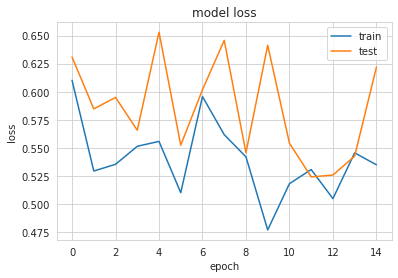

In [ ]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

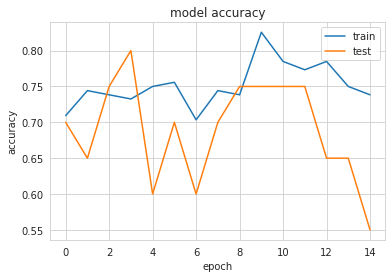

In [ ]:
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#**VGG19**

In [ ]:
from keras.applications.vgg19 import VGG19
HEIGHT = 224
WIDTH = 224
CLASSES = 2
BATCH_SIZE = 32
 
base_model = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(HEIGHT, WIDTH, 3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.vgg19 import VGG19, preprocess_input

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 172 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
EPOCHS = 10
BATCH_SIZE = 32


MODEL_FILE = 'vgg19.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator)
  
model.save(MODEL_FILE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
6/6 [==============================] - 125s 21s/step - loss: 1.6496 - accuracy: 0.5698 - val_loss: 0.8166 - val_accuracy: 0.7000
Epoch 2/10
6/6 [==============================] - 125s 21s/step - loss: 1.5162 - accuracy: 0.5988 - val_loss: 0.8252 - val_accuracy: 0.6500
Epoch 3/10
6/6 [==============================] - 124s 21s/step - loss: 1.3475 - accuracy: 0.6744 - val_loss: 0.9257 - val_accuracy: 0.6000
Epoch 4/10
6/6 [==============================] - 124s 21s/step - loss: 1.5375 - accuracy: 0.5581 - val_loss: 0.7589 - val_accuracy: 0.7500
Epoch 5/10
6/6 [==============================] - 124s 21s/step - loss: 1.3036 - accuracy: 0.6047 - val_loss: 0.6796 - val_accuracy: 0.7500
Epoch 6/10
6/6 [==============================] - 124s 21s/step - loss: 1.2093 - accuracy: 0.7035 - val_loss: 0.8301 - val_accuracy: 0.7000
Epoch 7/10
6/6 [==============================] - 124s 21s/step - loss: 1.4168 - accuracy: 0.6337 - val_loss: 0.6894 - val_accuracy: 0.7000
Epoch 8/10
6/6 [====

Increasing the number of epochs would've improved the performance of the model

In [ ]:
# testing the model
model.evaluate_generator(validation_generator, steps=1,  max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.7377889752388, 0.699999988079071]

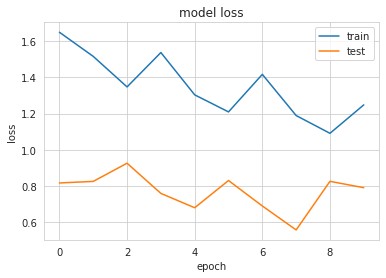

In [ ]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

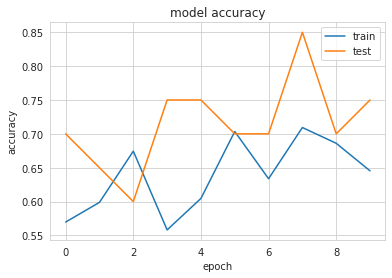

In [ ]:
# summarize history for accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
!jupyter nbconvert --to html '/content/SHENZEN_DATA (3).ipynb'

[NbConvertApp] Converting notebook /content/SHENZEN_DATA (3).ipynb to html
[NbConvertApp] Writing 538385 bytes to /content/SHENZEN_DATA (3).html
